We start by importing the essential Python libraries for data manipulation, visualization, and numerical operations.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from scipy.stats import pearsonr

pd.set_option('display.max_columns', None)

### 📂 Loading and Inspecting the Dataset  

In this step, we:  
1. Load the dataset `urban_pluvial_flood_risk_dataset.csv` into a Pandas DataFrame.  
2. Print the shape of the dataset (rows, columns).  
3. Display the first few rows to get an overview of the data.  
4. Check for missing values in each column.  
5. Print the data types of all columns to understand the structure of the dataset.  


In [3]:

df = pd.read_csv( 'urban_pluvial_flood_risk_dataset.csv')

print('Dataset Shape:', df.shape)
display(df.head())
print('\nMissing Values:\n', df.isnull().sum())
print('\nData Types:\n', df.dtypes)

Dataset Shape: (2963, 17)


,segment_id,city_name,admin_ward,latitude,longitude,catchment_id,elevation_m,dem_source,land_use,soil_group,drainage_density_km_per_km2,storm_drain_proximity_m,storm_drain_type,rainfall_source,historical_rainfall_intensity_mm_hr,return_period_years,risk_labels
0,SEG-00001,"Colombo, Sri Lanka",Borough East,6.920633,79.912600,CAT-136,NaN,Copernicus_EEA-10_v5,Institutional,NaN,4.27,160.5,CurbInlet,ERA5,39.4,50,monitor
1,SEG-00002,"Chennai, India",Ward D,13.076487,80.281774,CAT-049,-2.19,Copernicus_EEA-10_v5,Residential,D,7.54,NaN,OpenChannel,ERA5,56.8,25,ponding_hotspot|low_lying|event_2025-05-02
2,SEG-00003,"Ahmedabad, India",Sector 12,23.019473,72.638578,CAT-023,30.88,SRTM_3arc,Industrial,B,11.00,152.5,OpenChannel,IMD,16.3,5,monitor
3,SEG-00004,"Hong Kong, China",Sector 14,22.302602,114.078673,CAT-168,24.28,SRTM_3arc,Residential,B,7.32,37.0,Manhole,ERA5,77.0,10,monitor
4,SEG-00005,"Durban, South Africa",Sector 5,-29.887602,30.911008,CAT-171,35.70,SRTM_3arc,Industrial,C,4.50,292.4,OpenChannel,ERA5,20.8,5,monitor



Missing Values:
 segment_id                               0
city_name                                0
admin_ward                               0
latitude                                 0
longitude                                0
catchment_id                             0
elevation_m                            161
dem_source                               0
land_use                                 0
soil_group                             362
drainage_density_km_per_km2            284
storm_drain_proximity_m                239
storm_drain_type                       178
rainfall_source                        315
historical_rainfall_intensity_mm_hr      0
return_period_years                      0
risk_labels                              0
dtype: int64

Data Types:
 segment_id                              object
city_name                               object
admin_ward                              object
latitude                               float64
longitude                           

### 🧹 Data Cleaning: Handling Duplicates and Missing Values  

In this step, we clean the dataset by:  

1. **Removing Duplicates**  
   - Any duplicate rows are dropped to ensure data consistency.  

2. **Handling Missing Values**  
   - For **numerical columns** (`float64`, `int64`): missing values are replaced with the **median** (to reduce the effect of outliers).  
   - For **categorical columns**: missing values are filled with the **mode** (most frequent value).  

3. **Verification**  
   - After cleaning, we check again for any remaining missing values in the dataset.  


In [4]:
df = df.drop_duplicates()

for col in df.columns:
    if df[col].dtype in ['float64', 'int64']:
        df[col] = df[col].fillna(df[col].median())
    else:
        df[col] = df[col].fillna(df[col].mode()[0])

print('After Cleaning - Missing Values:\n', df.isnull().sum())

After Cleaning - Missing Values:
 segment_id                             0
city_name                              0
admin_ward                             0
latitude                               0
longitude                              0
catchment_id                           0
elevation_m                            0
dem_source                             0
land_use                               0
soil_group                             0
drainage_density_km_per_km2            0
storm_drain_proximity_m                0
storm_drain_type                       0
rainfall_source                        0
historical_rainfall_intensity_mm_hr    0
return_period_years                    0
risk_labels                            0
dtype: int64


### 📈 Statistical Summary of Numerical Features  

In this step, we generate a **descriptive statistical summary** of all numerical columns in the dataset using `df.describe()`.  

This provides key insights such as:  
- **Count** → Number of non-null values.  
- **Mean** → Average value of the column.  
- **Standard Deviation (std)** → Measure of spread/variation in the data.  
- **Min / Max** → Range of values.  
- **25%, 50%, 75% (Quartiles)** → Distribution spread, useful for identifying skewness and outliers.  

This summary helps us quickly understand the central tendency, variability, and potential anomalies in the dataset.  


In [5]:
df.describe()

,latitude,longitude,elevation_m,drainage_density_km_per_km2,storm_drain_proximity_m,historical_rainfall_intensity_mm_hr,return_period_years
count,2963.000000,2963.000000,2963.000000,2963.000000,2963.000000,2963.000000,2963.000000
mean,19.399103,31.676123,37.007357,6.286949,120.661188,43.811441,19.730003
std,24.446320,79.542482,37.749797,2.079895,103.681040,25.221200,25.182883
min,-36.999038,-123.292949,-3.000000,1.270000,0.200000,5.400000,2.000000
25%,6.580006,-43.124581,9.540000,4.835000,51.150000,25.800000,5.000000
50%,23.760802,36.889173,25.130000,6.250000,91.700000,37.900000,10.000000
75%,37.887422,101.701136,57.010000,7.670000,155.350000,55.550000,25.000000
max,55.821219,174.911271,266.700000,12.070000,751.700000,150.000000,100.000000


#### VIZUALIZATION

### 📊 Land Use Distribution  

In this step, we analyze the **distribution of land use types** in the dataset:  

- A **bar chart** is plotted to show the frequency of each land use category.  
- The **x-axis** represents different land use types.  
- The **y-axis** shows the count of records belonging to each category.  
- This helps us understand which land use types dominate in the dataset and whether the distribution is balanced or skewed.  


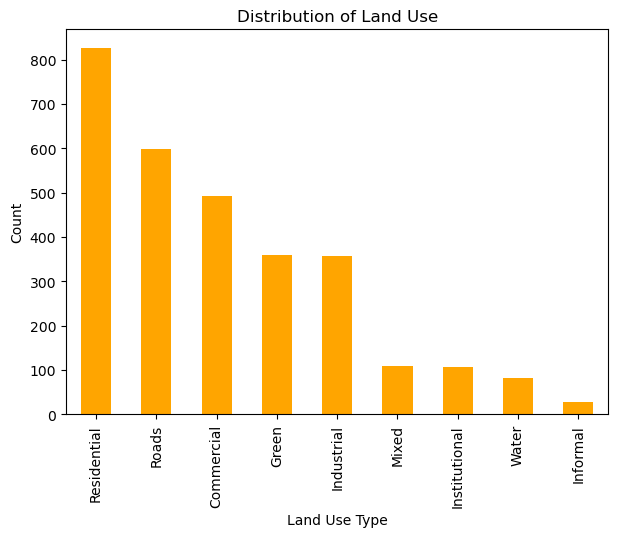

In [6]:
df['land_use'].value_counts().plot(kind='bar', figsize=(7,5), color='orange')
plt.xlabel('Land Use Type')
plt.ylabel('Count')
plt.title('Distribution of Land Use')
plt.show()

### 🌧️ Distribution of Historical Rainfall Intensity  

In this step, we visualize the **historical rainfall intensity** to understand its distribution:  

- A **histogram** with 30 bins is plotted for rainfall intensity (in mm/hr).  
- The **x-axis** shows rainfall intensity values.  
- The **y-axis** represents the frequency of occurrences.  
- This helps identify whether rainfall intensity follows a normal distribution, is skewed, or has outliers that may influence flood risk.  

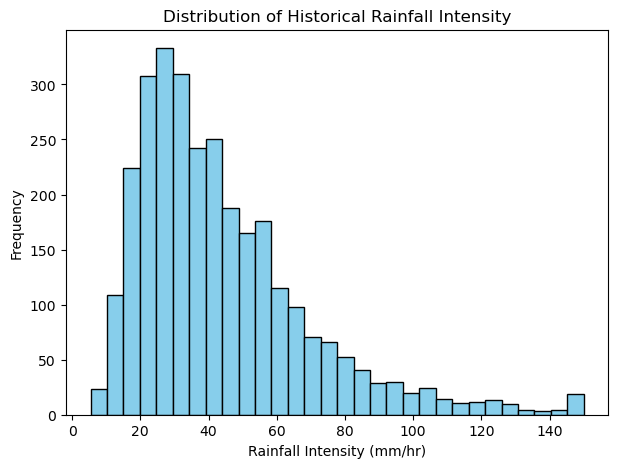

In [7]:
plt.figure(figsize=(7,5))
plt.hist(df['historical_rainfall_intensity_mm_hr'], bins=30, color='skyblue', edgecolor='black')
plt.xlabel('Rainfall Intensity (mm/hr)')
plt.ylabel('Frequency')
plt.title('Distribution of Historical Rainfall Intensity')
plt.show()

## 📊Rainfall Intensity vs Return Period

### Purpose
Analyze the relationship between rainfall intensity and return period to understand extreme weather event frequencies.


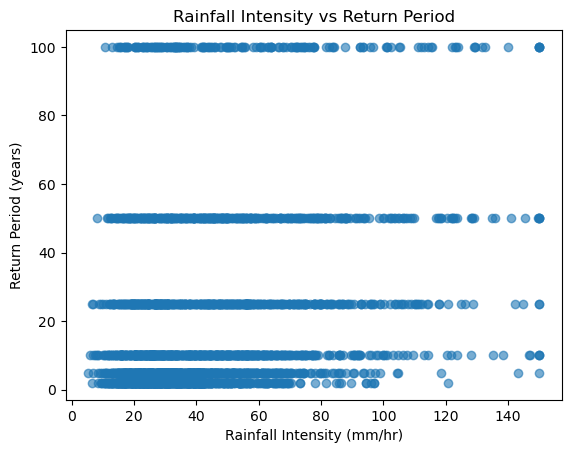

In [9]:
plt.scatter(df['historical_rainfall_intensity_mm_hr'], df['return_period_years'], alpha=0.6)
plt.xlabel('Rainfall Intensity (mm/hr)')
plt.ylabel('Return Period (years)')
plt.title('Rainfall Intensity vs Return Period')
plt.show()

## 📊Elevation vs Return Period

### Purpose
Examine the relationship between ground elevation and flood event frequency to identify topographic vulnerability patterns.

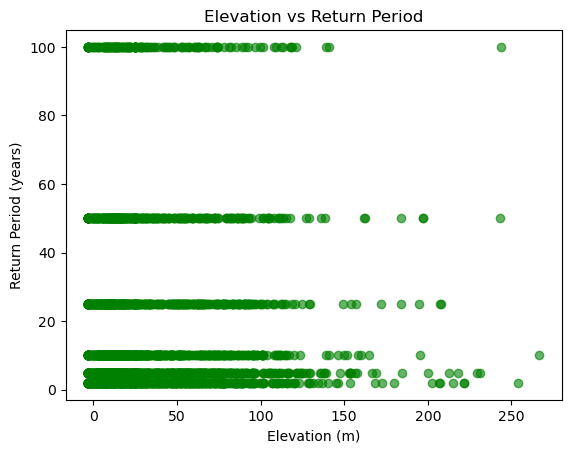

In [10]:
plt.scatter(df['elevation_m'], df['return_period_years'], alpha=0.6, color='green')
plt.xlabel('Elevation (m)')
plt.ylabel('Return Period (years)')
plt.title('Elevation vs Return Period')
plt.show()

## 📊 Visualization: Flood Risk Distribution by Land Use Type

### Purpose
Analyze how different land use categories (residential, commercial, industrial, etc.) are distributed across flood risk levels to identify vulnerable urban zones.

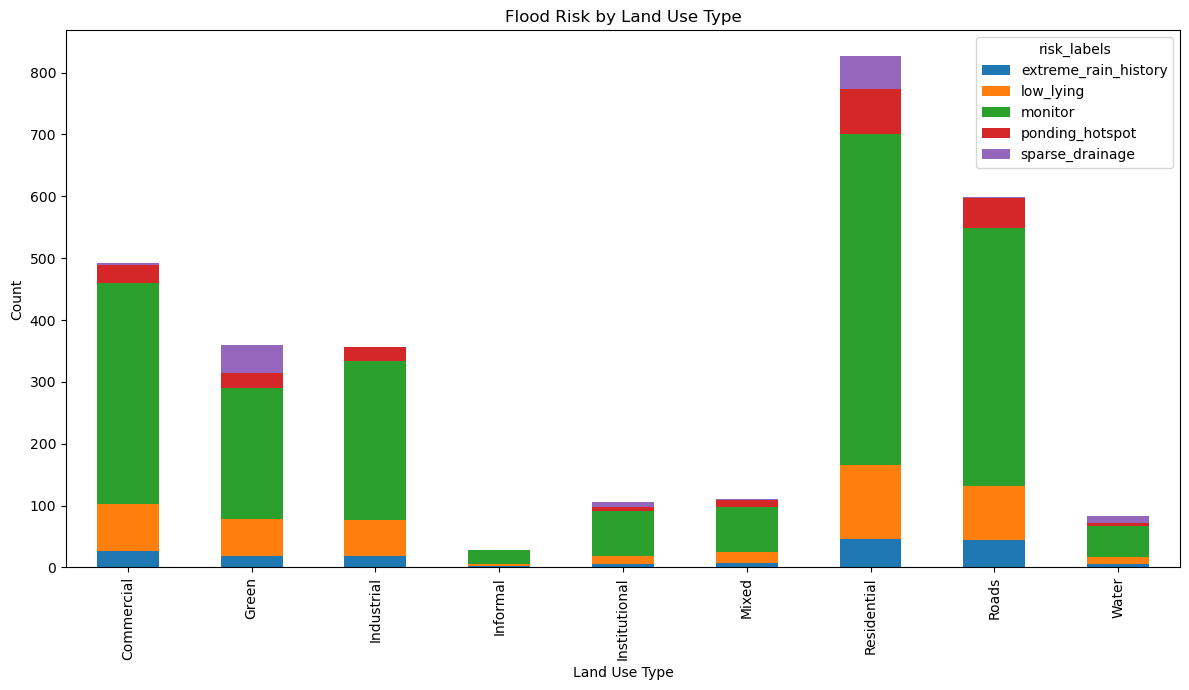

In [15]:
df['risk_labels'] = df['risk_labels'].str.split('|').str[0]  # keep only first part before '|'

landuse_counts = df.groupby(['land_use', 'risk_labels']).size().reset_index(name='count')
landuse_pivot = landuse_counts.pivot_table(index='land_use', columns='risk_labels',
                                           values='count', fill_value=0)

landuse_pivot.plot(kind='bar', stacked=True, figsize=(12,7))
plt.xlabel('Land Use Type')
plt.ylabel('Count')
plt.title('Flood Risk by Land Use Type')
plt.tight_layout()
plt.show()

## 📊 Multivariate Analysis: Correlation Heatmap & Statistical Testing

### Purpose
Identify linear relationships between all numeric variables to understand which factors are most strongly associated with flood risk and guide multivariate analysis.

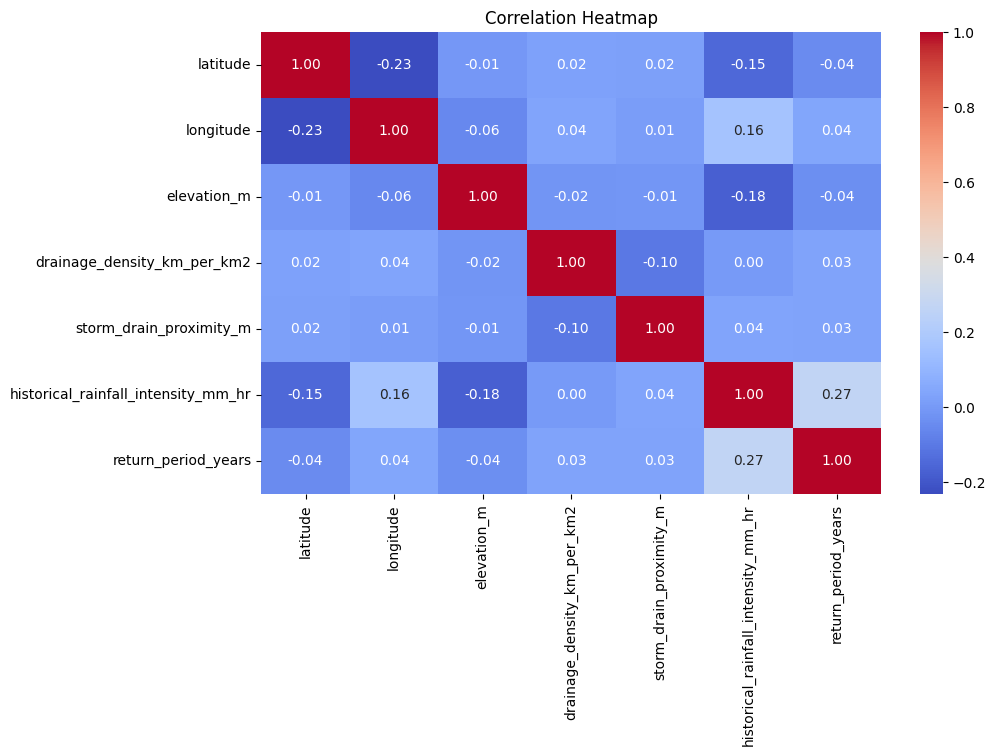

Pearson correlation (Rainfall Intensity vs Return Period): 0.266, p=0.000


In [49]:
corr = df.select_dtypes(include=[np.number]).corr()
plt.figure(figsize=(10,6))
sns.heatmap(corr, cmap='coolwarm', annot=True, fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

pearson_corr, p_value = pearsonr(df['historical_rainfall_intensity_mm_hr'], df['return_period_years'])
print(f'Pearson correlation (Rainfall Intensity vs Return Period): {pearson_corr:.3f}, p={p_value:.3f}')


## 📊Ponding Duration Distribution by City and Risk Level

### Purpose
Compare ponding duration patterns across different cities while examining how risk levels vary within each urban area. This helps identify cities with the most severe flooding issues and understand geographic variation in flood vulnerability.

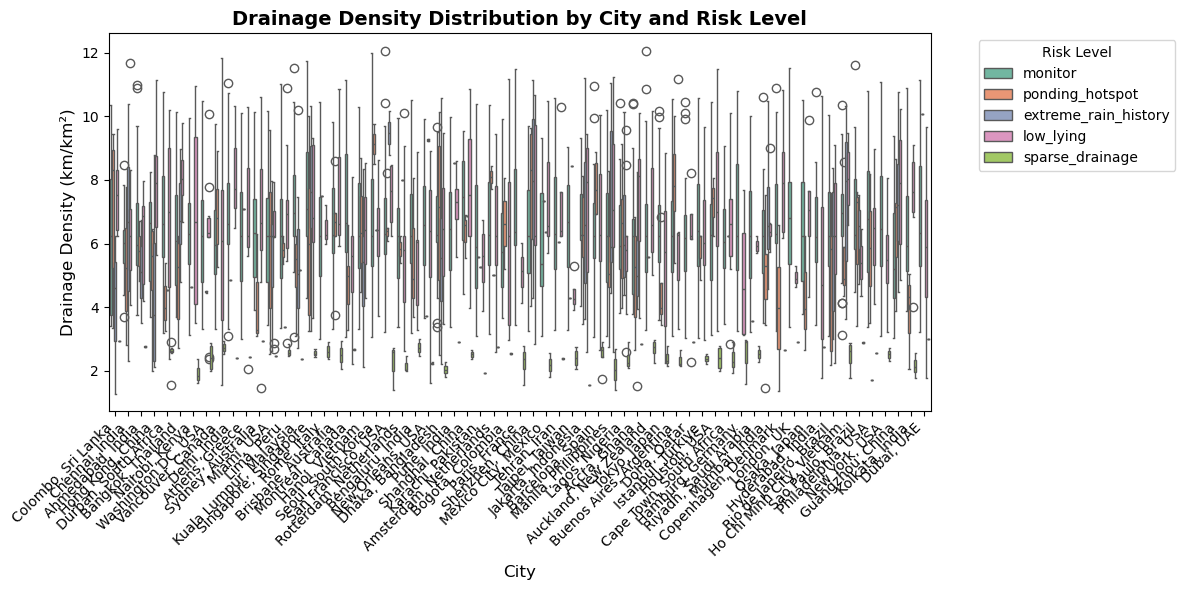

In [ ]:

df['risk_labels'] = df['risk_labels'].str.split('|').str[0]

plt.figure(figsize=(12, 6))
sns.boxplot(
    data=df, 
    x='city_name', 
    y='drainage_density_km_per_km2', 
    hue='risk_labels', 
    palette='Set2'
)

plt.xlabel('City', fontsize=12)
plt.ylabel('Drainage Density (km/km²)', fontsize=12)
plt.title('Drainage Density Distribution by City and Risk Level', fontsize=14, fontweight='bold')
plt.xticks(rotation=45,     ha='right')

plt.legend(title='Risk Level', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

## 📊Average Ponding Duration by Risk Level

### Purpose
Show the clear relationship between risk classification and actual flood severity measured by ponding duration. This simple visualization validates the risk labeling system and communicates flood impact to non-technical stakeholders.

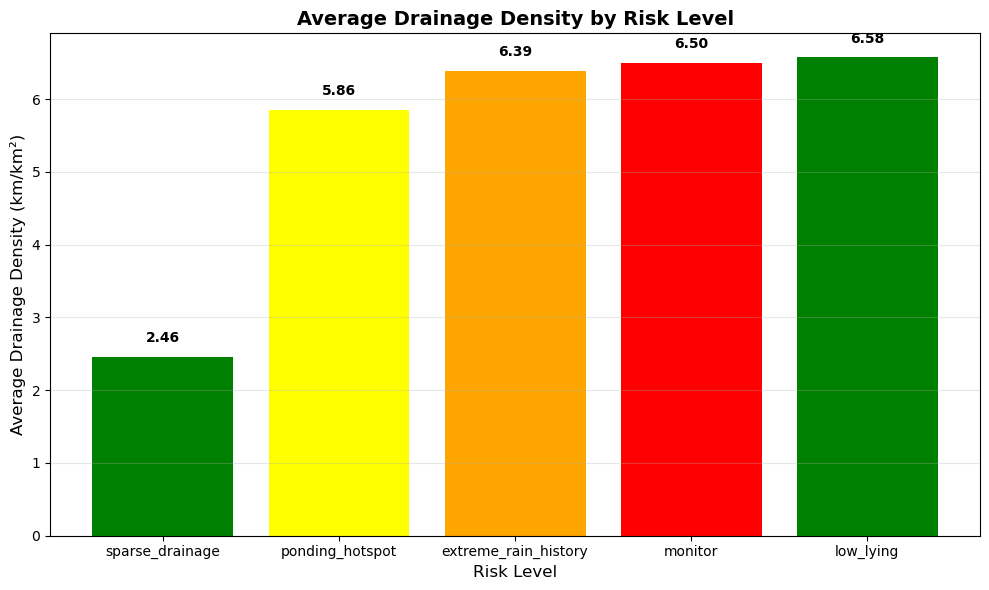

In [ ]:

df['risk_labels'] = df['risk_labels'].str.split('|').str[0]


avg_ponding = (
    df.groupby('risk_labels')['drainage_density_km_per_km2']
    .mean()
    .sort_values()
)

# Plot
plt.figure(figsize=(10, 6))
bars = plt.bar(avg_ponding.index, avg_ponding.values, 
               color=['green', 'yellow', 'orange', 'red'])

plt.xlabel('Risk Level', fontsize=12)
plt.ylabel('Average Drainage Density (km/km²)', fontsize=12)
plt.title('Average Drainage Density by Risk Level', fontsize=14, fontweight='bold')
plt.grid(axis='y', alpha=0.3)


for i, v in enumerate(avg_ponding.values):
    plt.text(i, v + 0.2, f'{v:.2f}', ha='center', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()